# BoomBikes

BoomBikes is a US bike-sharing provider. They use a bike share system which allows people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock of BoomBikes.

### Problem statement

BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. It has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


### Agends:
    - Data understanding
    - Data visualisation
        - univariate
        - Bivariate
    - Data preprocessing
        - dummy variables
        - train-test split
        - scaling    
    - Model preparation
        - RFE
        - Using Statsmodel library to find statistics
    - Model evaluation and checking LR assumptions
        - Linearity
        - Residual errors
        - homoscedasticity
        - Independent error terms
    - Perdictions using final model
    - Model evaluation on test set.
    - Summary

In [1]:
# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [3]:
%matplotlib inline

### Data understanding

In [4]:
bikes = pd.read_csv("day.csv")

In [5]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes.shape

(730, 16)

In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No, null data in the data set. "dteday" should be converted to date object

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikes.dteday.unique()

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

Notes: Data contains complete details for two calander years(2018/2019).

In [10]:
# checking for duplicate rows

bikes_dup = bikes.copy()

bikes_dup.drop_duplicates(subset=None)

print(bikes.shape)
print(bikes_dup.shape)

(730, 16)
(730, 16)


Notes: No duplicates in the dataset

In [11]:
# Convert the 'dteday' object to datetime64
bikes['dteday'] = bikes.dteday.astype('datetime64')

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
print(bikes.season.unique())
print(bikes.weathersit.unique())

[1 2 3 4]
[2 1 3]


In [15]:
# Convert both season and weathersit to categorical values as the data in both the columns doesnot represent ordered data.
bikes.weathersit = pd.Categorical(bikes.weathersit)
bikes.season = pd.Categorical(bikes.season)
bikes.yr = pd.Categorical(bikes.yr)
bikes.holiday = pd.Categorical(bikes.holiday)
bikes.workingday = pd.Categorical(bikes.workingday)
bikes.weekday = pd.Categorical(bikes.weekday)
bikes.mnth = pd.Categorical(bikes.mnth)

In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [17]:
# Drop instant column which is kind of index
bikes = bikes.drop('instant', axis = 1)

In [18]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# separate the feature to numerical and categorical types.

num_var = bikes.select_dtypes(['int64','float64']).columns.to_list()
print("num_var: ", num_var)

cat_var = bikes.select_dtypes('category').columns.to_list()
print("cat_var: ", cat_var)

num_var:  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cat_var:  ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


### Data visualisation

In [20]:
# Numerical variables with dist plot.

def plot_dist(df,cols,count):    
    plt.suptitle("Distplot and Boxplot for Numerical variables")
    plt.figure(figsize=(15,38))
    for i in cols:        
        plt.subplot(9,2,count)
        count += 1
        sns.distplot(df[i],color='y',bins=12)
        plt.subplot(9,2,count)
        count += 1
        sns.boxplot(df[i],color='g')

    plt.show()

<Figure size 640x480 with 0 Axes>

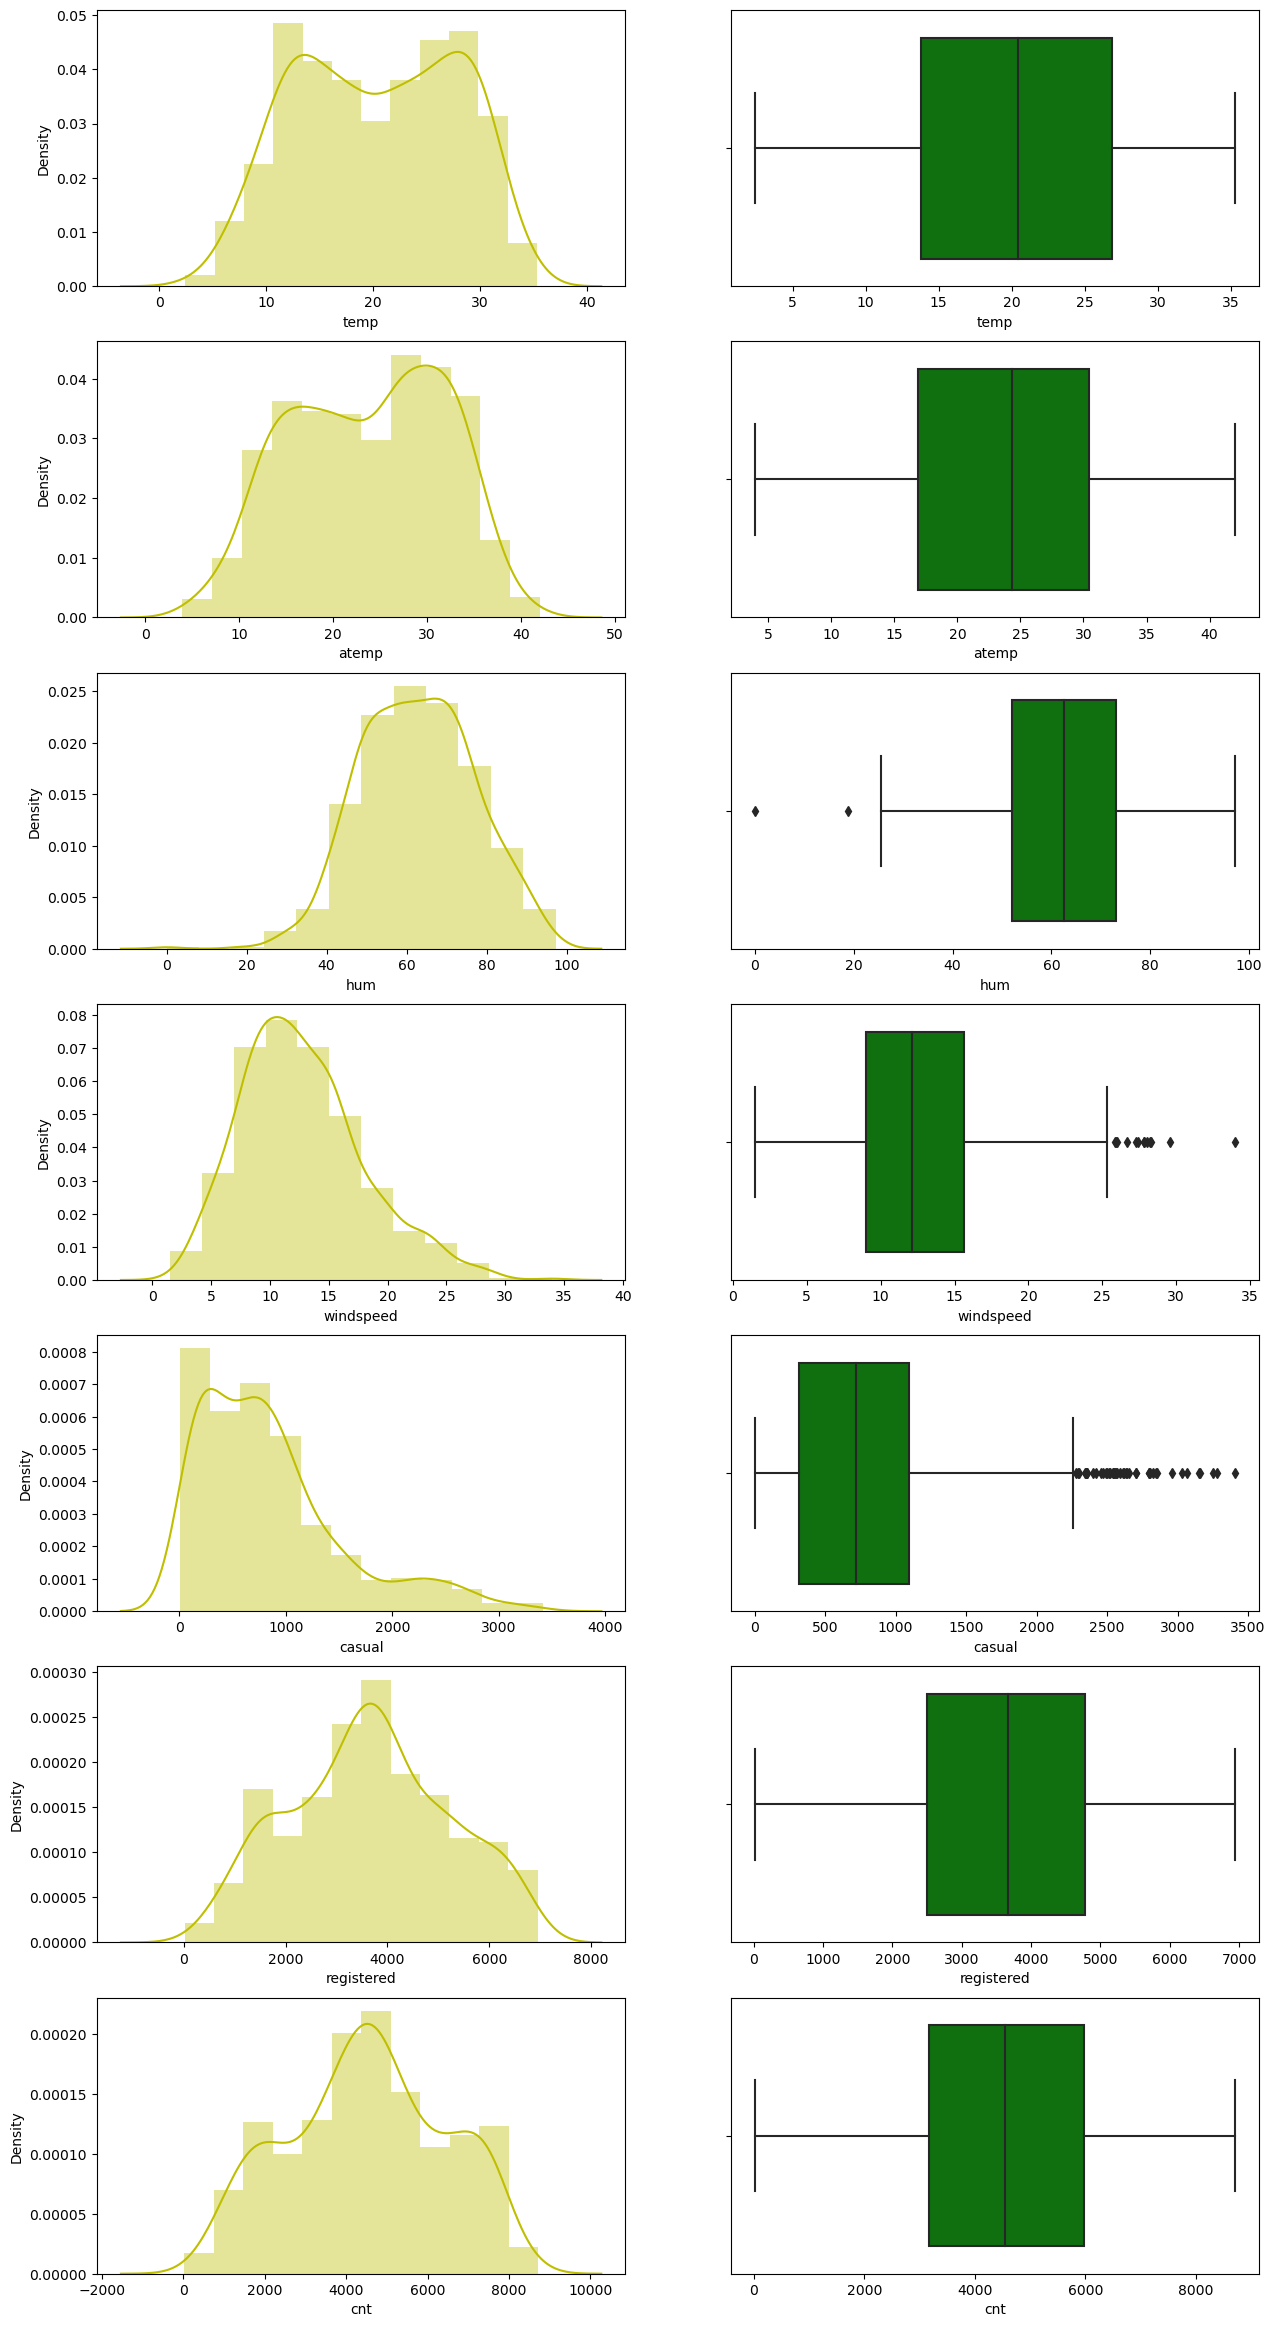

In [21]:
plot_dist(bikes,num_var,1);

Notes: *Distribution of 'cnt' and 'registered' follow the same pattern. 
    So most of the bike bookings are coming from registered customers*

In [22]:
# Categorical variables with dist plot.
def plot_count(df,cols,count):    
    plt.figure(figsize=(15,18))
    plt.suptitle("Count plot for Categorical variables")
    for i in cols:
            plt.subplot(4,2,count)
            count += 1
            sns.countplot(df[i])

    plt.show()

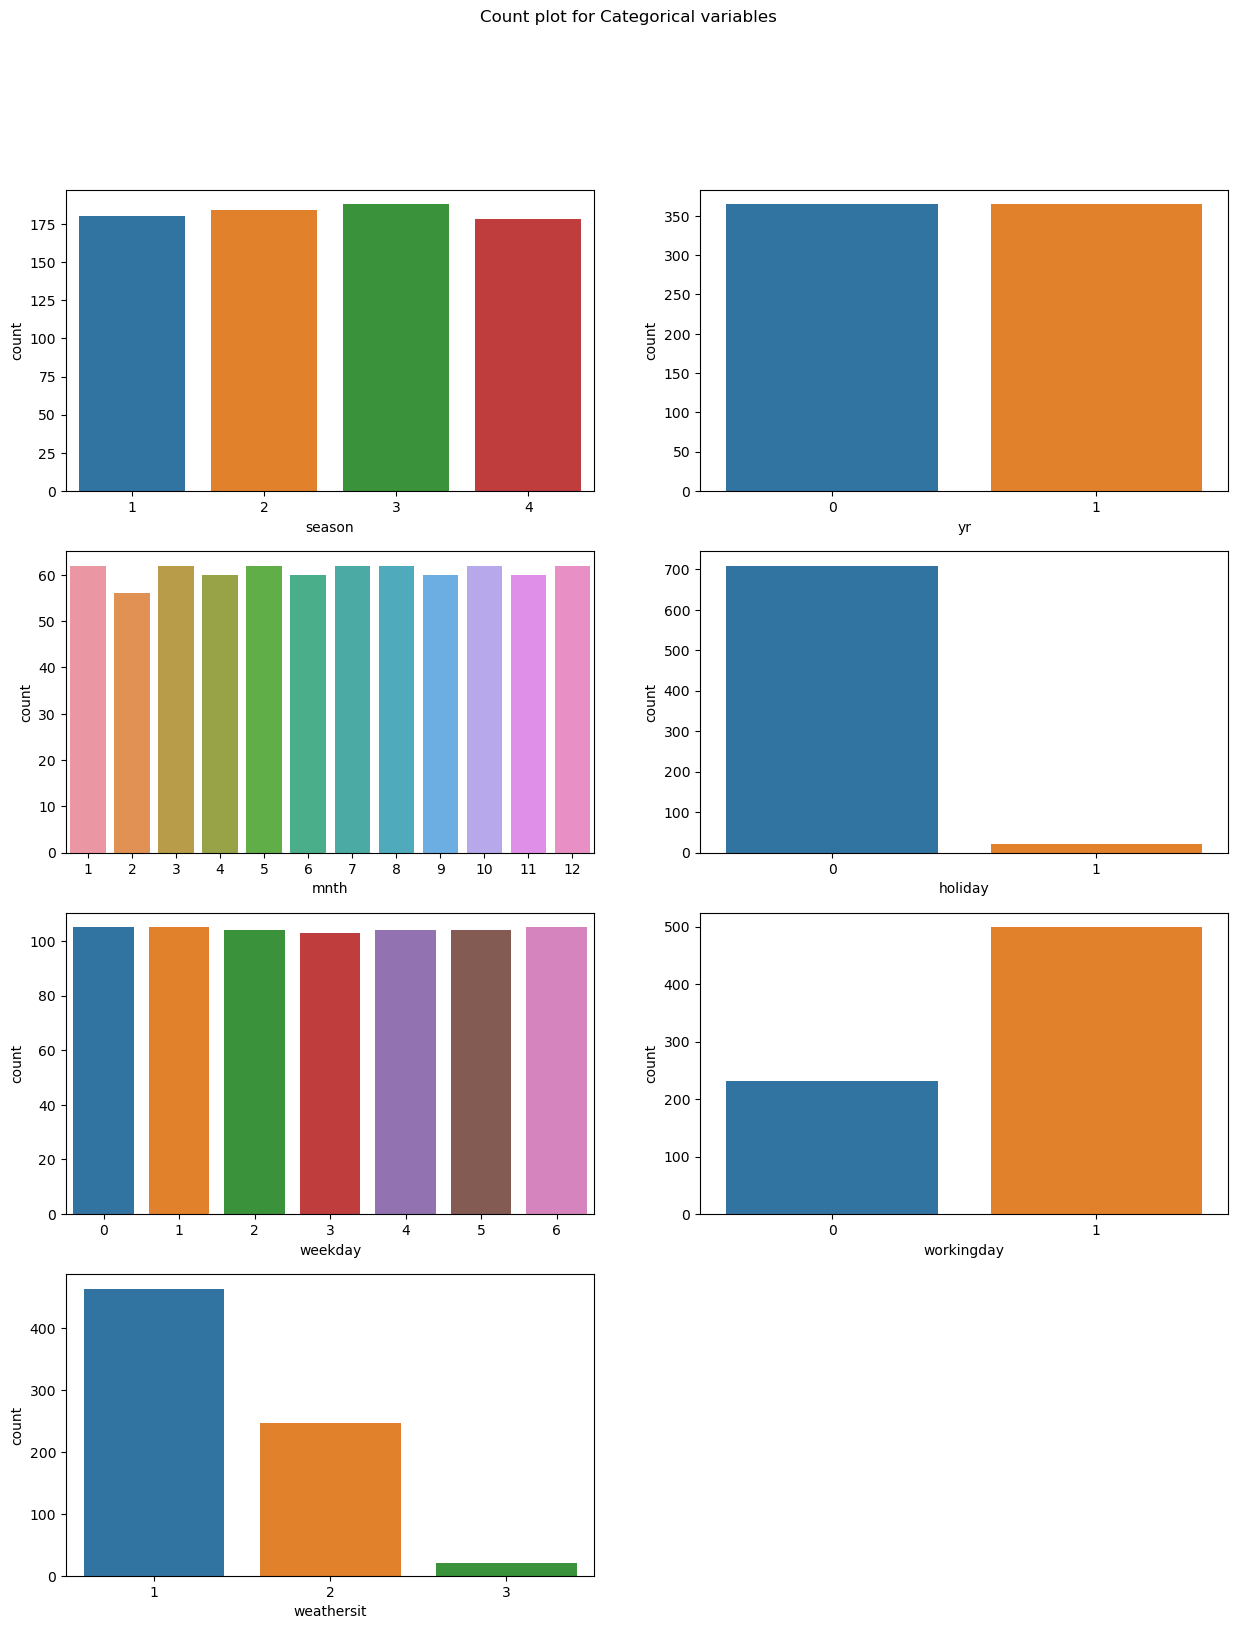

In [23]:
plot_count(bikes,cat_var,1)

*Notes*: From weathersit plot, we can say that major part of both the years is clear or with few clouds. There are no site of extreme weathers.

### Bivariate analysis
    

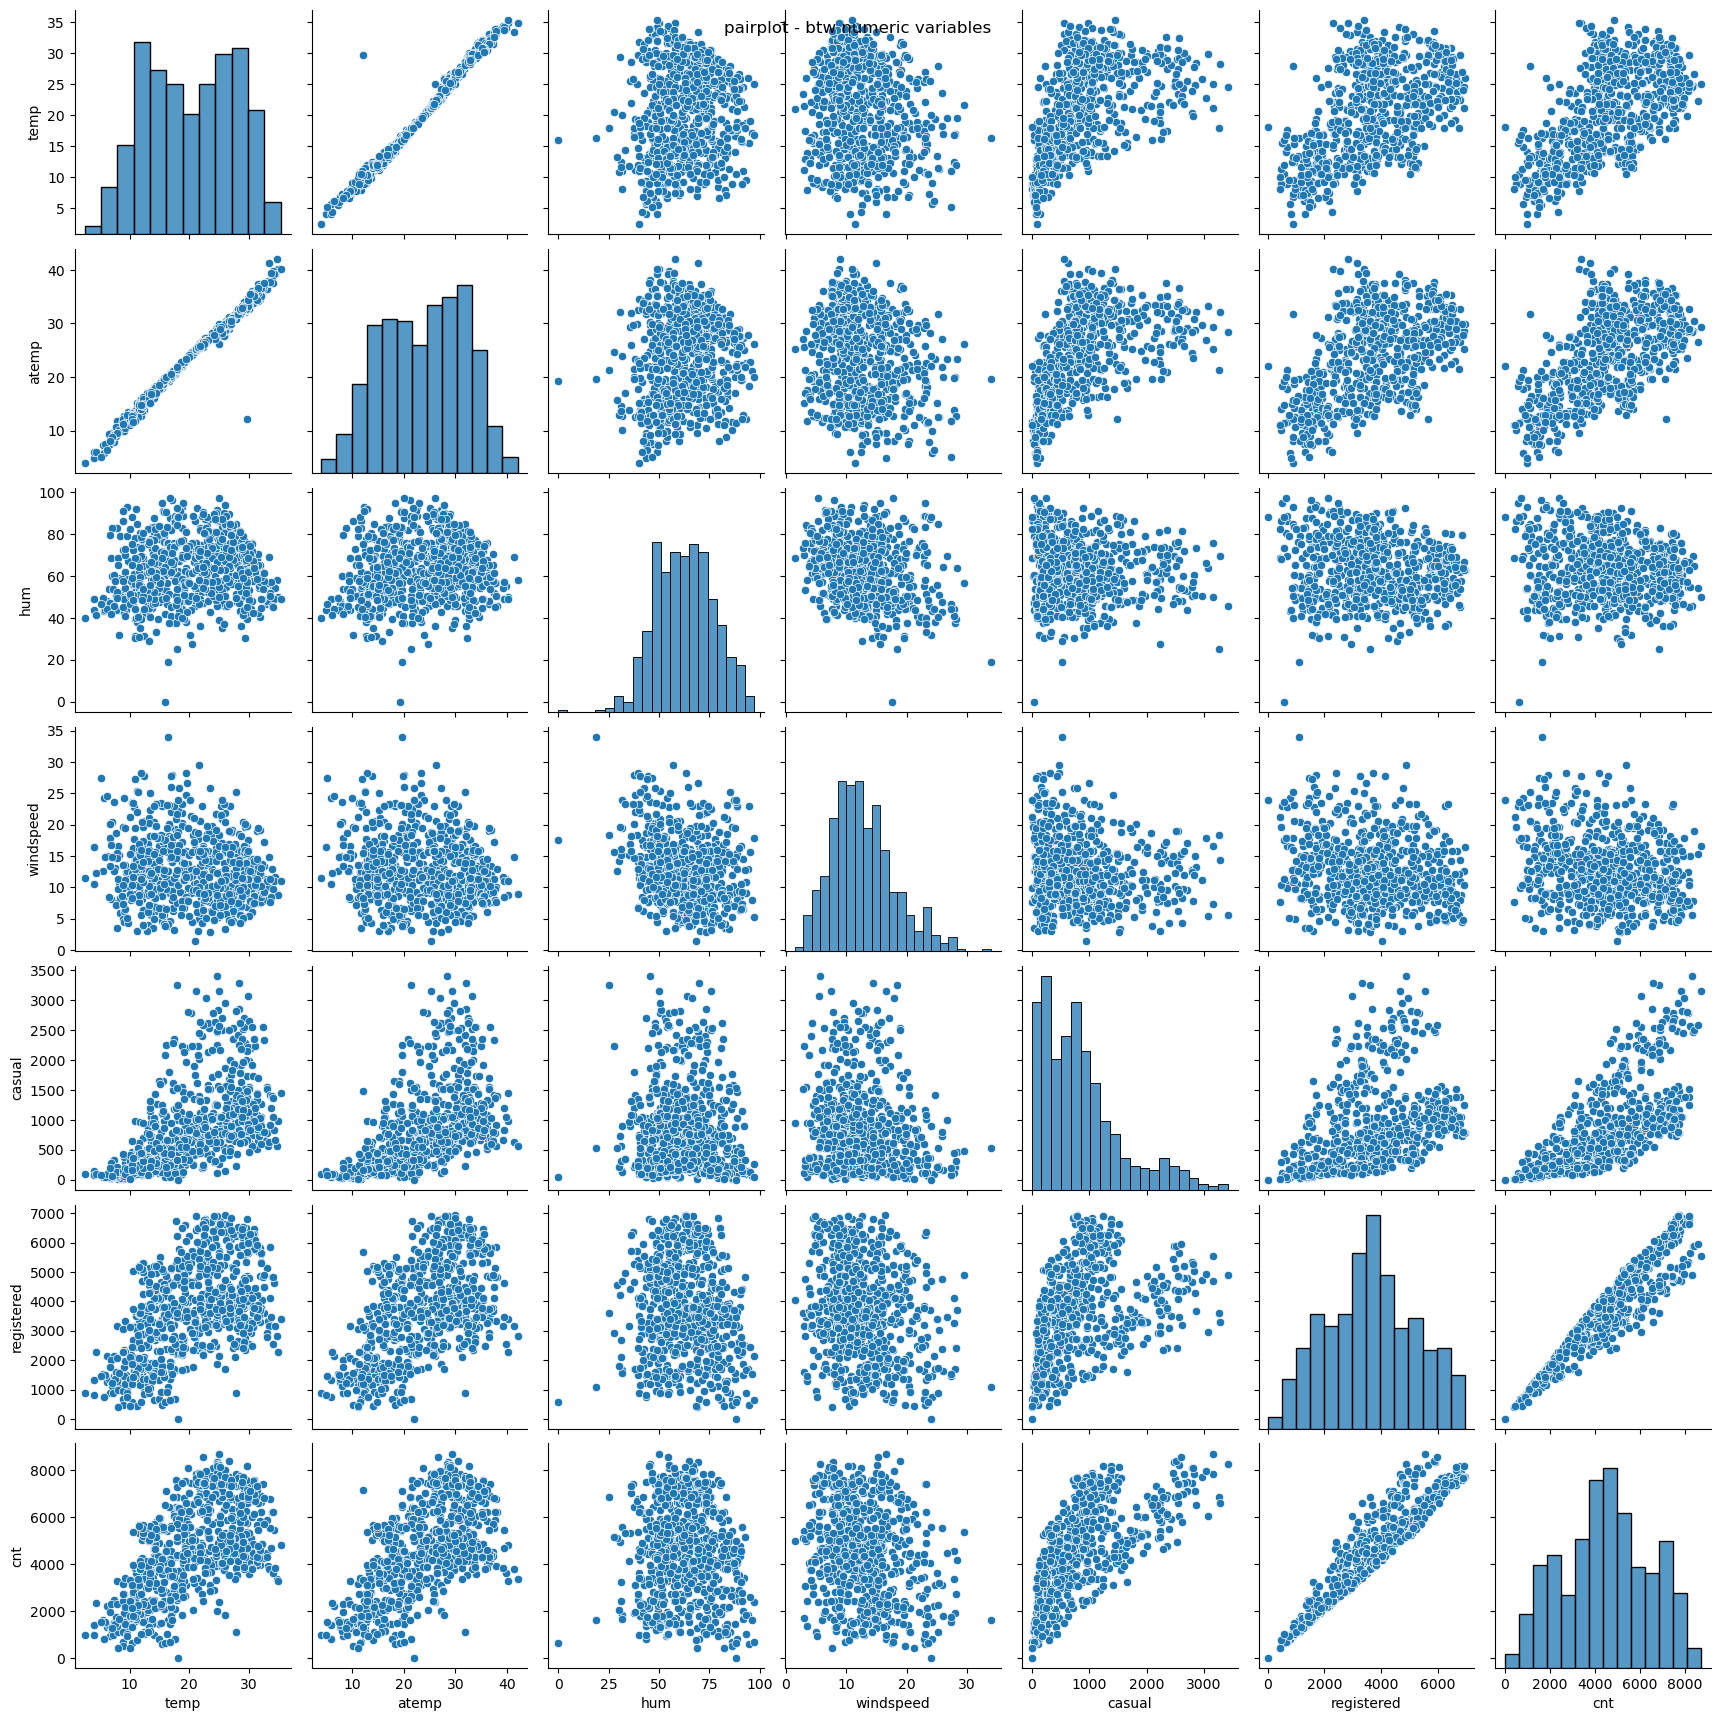

In [24]:
# pairplot - btw numeric variables
pp = sns.pairplot(data=bikes[num_var])
pp.fig.suptitle("pairplot - btw numeric variables ")
plt.show()

Notes: From the above pair plot, lets focus on the last line with 'cnt' as y axis.
    
>- *'cnt vs mnt', shows that the number of bookings increases in the months of May till September which is usually the summer period.*<br>
>- *Same is also observed in "cnt vs temp" and "cnt vs atemp". As the temperature increase, the booking increases* 

Text(0, 0.5, 'total count per day in a week')

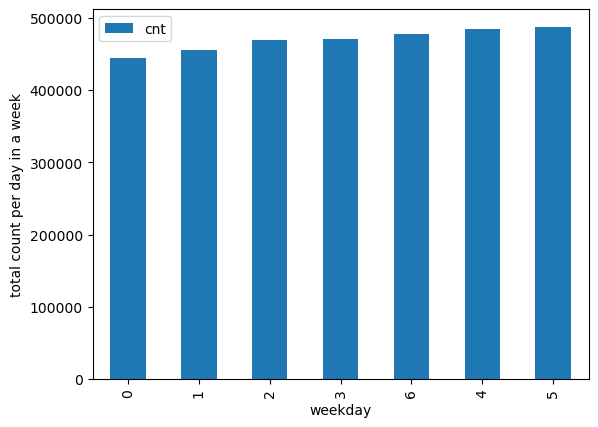

In [25]:
# count plot of number of booking for each day in a week

pd.pivot_table(data=bikes,index='weekday',values='cnt',aggfunc=sum).sort_values('cnt',ascending=True).plot.bar()
plt.ylabel('total count per day in a week')


Notes: *Total number of bookings mostly same for all the days in week. There is little more demand on Thursday,Friday and Saturday. Little less on Sunday.*

Text(0.5, 0, 'months')

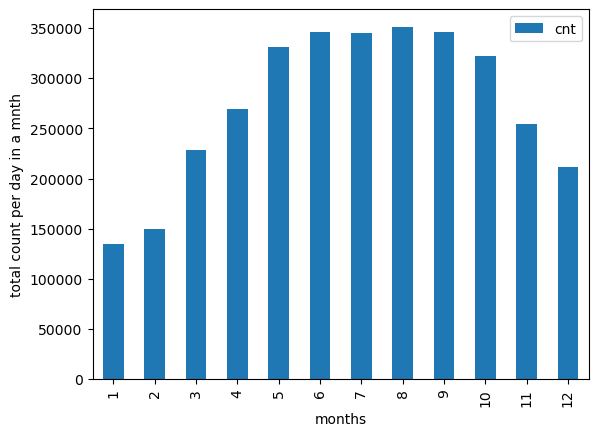

In [26]:
# count plot of total number of booking for each month

pd.pivot_table(data=bikes,index='mnth',values='cnt',aggfunc=sum).plot.bar()
plt.ylabel('total count per day in a mnth')
plt.xlabel('months')

Notes: *Total number of bookings are more during may-sep/oct but then there is a noticible drop. Same observed during univarite analysis*

<AxesSubplot:>

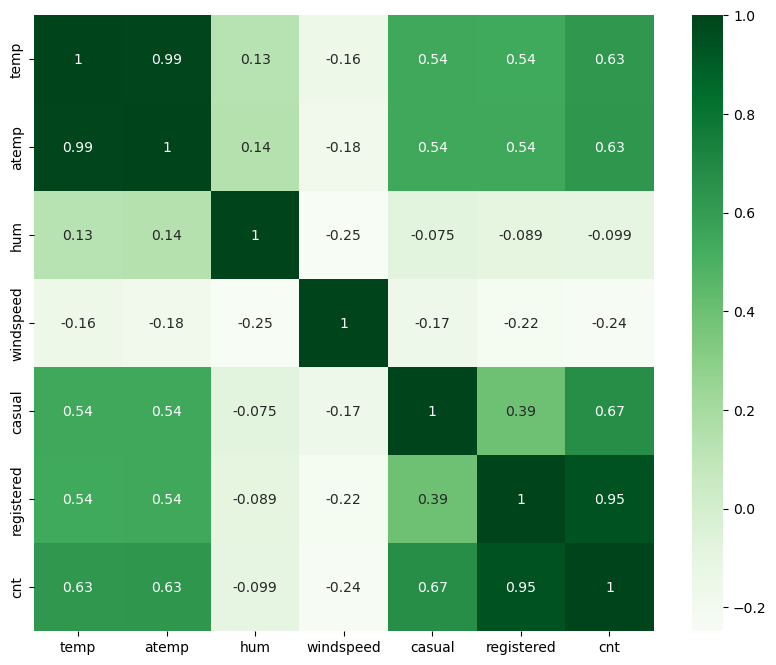

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(data=bikes.corr(), cmap='Greens', annot=True)

Notes: 
   
   __Positive correlation with Total bookings(cnt):__
    
    - registered & casual(but they are sub classification of 'cnt' - not relevant)
    - temp & atemp
    
   __Negative correlation with total bookinsg(cnt):__
   
    - windspeed
    - humidity


In [28]:
def cnt_vs_cat_var(df,cols,count=1):
    plt.figure(figsize=(15,20))
    for i in cols:
        plt.subplot(4,2,count)
        sns.boxplot(x=df[i],y=df['cnt'])
        count += 1
        plt.title(i +" vs total bookings(cnt)")
    plt.show()

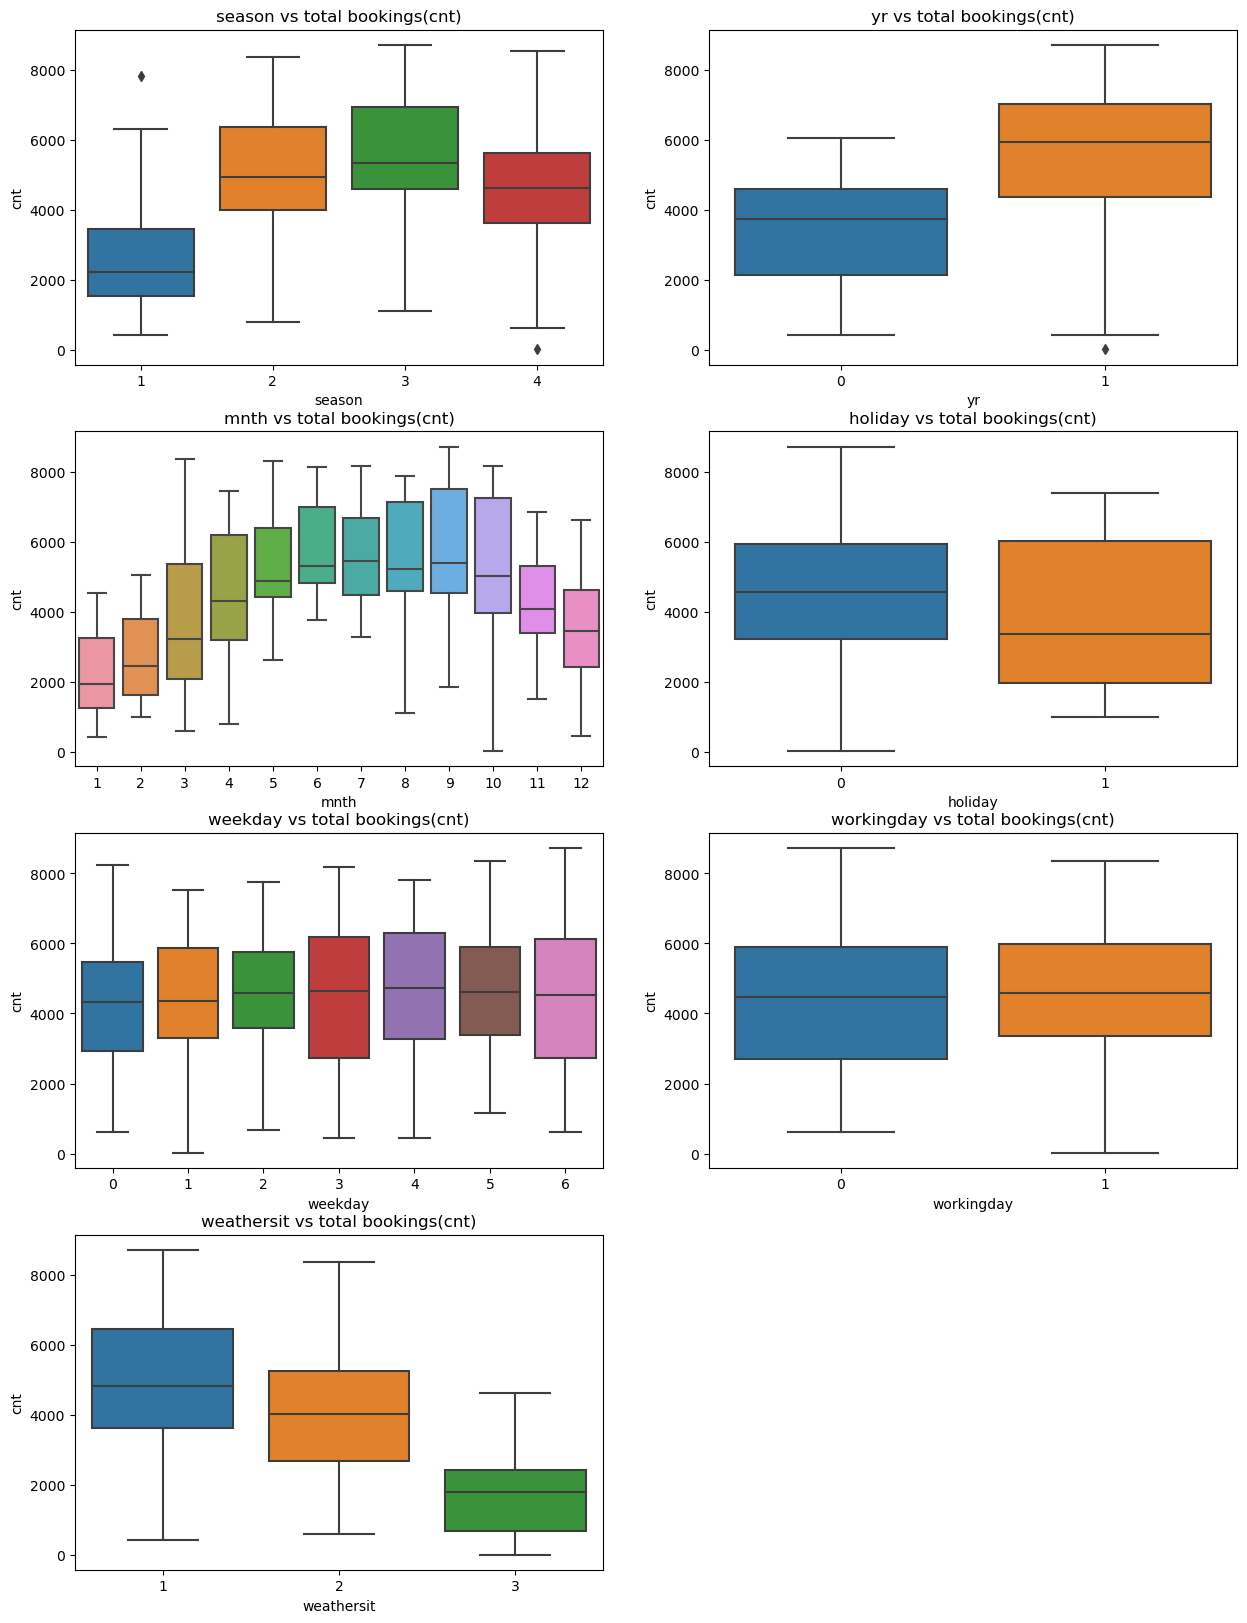

In [29]:
cnt_vs_cat_var(bikes,cat_var)

Notes:
       
> - __season vs cnt__
       - Season 3 which is the fall has maximum number of bookings.(season 3>2>4>1)
> - __year vs cnt__
       - 2019 has more number of bookings than previous year which is a good sign of companies growth.
> - __weathersit vs cnt__
        - '1' which represent clear or partly cloudy weather has more bookings.(weathersit-1>2>3)
> - __holiday vs cnt__
        - During the holidays, there is a dip in total number of bookings, if you compare 25-50 percentile.
> - __workingday vs cnt__
        - Workingday or not, they is no noticible different.
> - __month vs cnt__
        - Total number of bookings are more during May-Sep/Oct but then there is a noticeable drop. Same observed during univariate analysis
> - __week vs cnt__
        - Total number of bookings mostly same for all the days in week. There is little more demand on Thursday, Friday and Saturday. Little less on Sunday.   

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

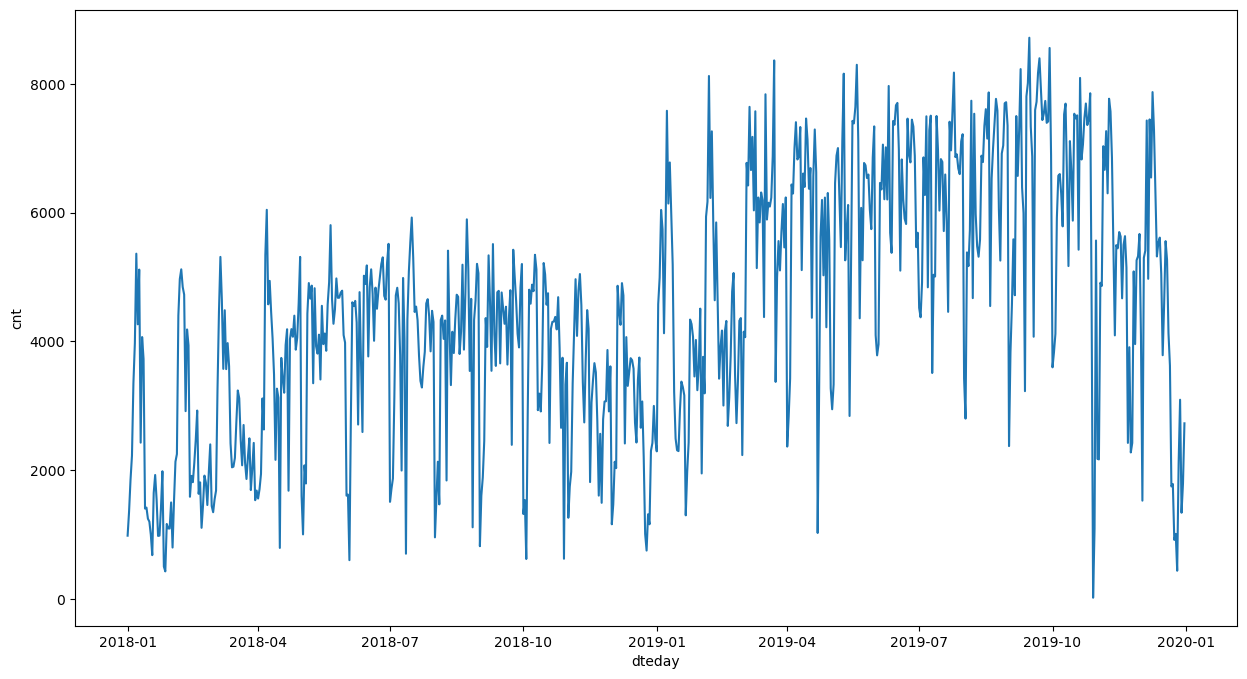

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(x='dteday', y='cnt',data=bikes)

In [31]:
bikes[(bikes['workingday'] == 1)]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2018-06-01,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2018-07-01,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2019-12-24,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
724,2019-12-26,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095


## Preparing for model

>- Data preparation: Below are the features which are dropped and their reasons
    - __casual__ and __registered__: These two variables are sub classification of total bookings(cnt) which is independent variable we would like to predit here.

In [32]:
#drop these parameters and creating new dataframe
bikes_new= bikes.copy()
bikes_new = bikes.drop(['casual','registered'],axis=1)

In [33]:
# dropping the dteday for now.
bikes_new = bikes_new.drop('dteday',axis=1)

In [34]:
bikes_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Data Preprocessing

##### Creating Dummy variables for Categorical variables

In [35]:
# First convert weekday and mnth to categorical variable
#bikes.weekday = pd.Categorical(bikes.weekday)
#bikes.mnth = pd.Categorical(bikes.mnth)

In [36]:
cat_dummy = ['season','weathersit','mnth','weekday']

bikes_new = pd.get_dummies(bikes_new,columns=cat_dummy,drop_first=True)

In [37]:
bikes_new = bikes_new.rename({'season_2':'season_summer','season_3':'season_fall', 'season_4': 'season_winter'},axis=1)

In [38]:
bikes_new = bikes_new.rename({'mnth_2':'mnth_feb',
                  'mnth_3':'mnth_mar', 
                  'mnth_4':'mnth_apr', 
                  'mnth_5':'mnth_may',
                  'mnth_6':'mnth_jun',
                  'mnth_7':'mnth_jul',
                  'mnth_8':'mnth_aug',
                  'mnth_9':'mnth_sep',
                  'mnth_10':'mnth_oct',
                  'mnth_11':'mnth_nov',
                  'mnth_12':'mnth_dec',},axis=1)

In [39]:
bikes_new.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_2,weathersit_3,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849,0.252055,0.257534,0.243836,0.336986,0.028767,...,0.082192,0.084932,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,7.506729,8.150308,14.237589,5.195841,1936.011647,0.434490,0.437576,0.429689,0.473004,0.167266,...,0.274845,0.278971,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
bikes_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'weathersit_2',
       'weathersit_3', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov',
       'mnth_dec', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

##### Train-test split

In [41]:
df_train,df_test = train_test_split(bikes_new,train_size=0.7,random_state=100)

In [42]:
df_train.shape

(510, 30)

In [43]:
df_test.shape

(220, 30)

In [44]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_2,weathersit_3,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,20.108257,23.500287,63.123710,12.834912,4485.337255,0.247059,0.262745,0.247059,0.345098,0.029412,...,0.080392,0.084314,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,7.431626,8.090963,14.153170,5.292031,1950.666077,0.431725,0.440557,0.431725,0.475867,0.169124,...,0.272166,0.278131,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Min-Max scaling on numerical variables

In [45]:
# Apply min-max scaling for below variables
num_scale = ['temp','atemp','hum','windspeed','cnt']

scaler = MinMaxScaler()


df_train[num_scale] = scaler.fit_transform(df_train[num_scale])


In [46]:
df_train[num_scale].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X_train = df_train.loc[:,df_train.columns != 'cnt']

In [48]:
X_train.shape

(510, 29)

In [49]:
y_train = df_train.cnt

## RFE 

Since there are 29 columns, lets use Recursive feature elimination method to identify the top feature variables.



In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [51]:
rfe = RFE(lr,n_features_to_select=15)

In [52]:
rfe = rfe.fit(X_train,y_train)

In [53]:
rfe_df = pd.DataFrame(np.array(list(zip(X_train.columns,rfe.support_,rfe.ranking_))),columns=['col_name','rfe_support','rfe_rank'])
rfe_df['rfe_rank'] = rfe_df['rfe_rank'].astype('int64')
print(rfe_df.sort_values('rfe_rank'))


         col_name rfe_support  rfe_rank
0              yr        True         1
20       mnth_oct        True         1
19       mnth_sep        True         1
18       mnth_aug        True         1
11   weathersit_3        True         1
10   weathersit_2        True         1
9   season_winter        True         1
8     season_fall        True         1
28      weekday_6        True         1
6       windspeed        True         1
1         holiday        True         1
2      workingday        True         1
7   season_summer        True         1
3            temp        True         1
5             hum        True         1
13       mnth_mar       False         2
15       mnth_may       False         3
14       mnth_apr       False         4
16       mnth_jun       False         5
4           atemp       False         6
12       mnth_feb       False         7
17       mnth_jul       False         8
21       mnth_nov       False         9
22       mnth_dec       False        10


In [54]:
# main columns after RFE
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weathersit_2',
       'weathersit_3', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'weekday_6'],
      dtype='object')


In [55]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_jul', 'mnth_nov', 'mnth_dec', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

## Using Statsmodel library to find statistics

### Model-1 with top 15 feature from RFE

In [56]:
# adding constant X_train
X_train_new = sm.add_constant(df_train[col])

In [57]:
lm_1 = sm.OLS(y_train,X_train_new).fit()

In [58]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          5.17e-191
Time:                        17:07:24   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1952      0.029      6.790      0.000       0.139       0.252
yr                0.2301      0.008     28.743      0.000       0.214       0.246
holiday          -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday        0.0445      0.012      3.856      0.000       0.022       0.067
temp              0.4972      0.034     14.821      0.000       0.431       0.563
hum              -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed        -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_summer     0.1183      0.015      8.038      0.000       0.089       0.147
season_fall       0.0292      0.022      1.329      0.184      -0.014       0.072
season_winter     0.1430      0.013     10.671      0.000       0.117       0.169
weathersit_2     -0.0577      0.010     -5.564      0.000      -0.078      -0.037
weathersit_3     -0.2507      0.026     -9.579      0.000      -0.302      -0.199
mnth_aug          0.0473      0.017      2.732      0.007       0.013       0.081
mnth_sep          0.1176      0.017      6.876      0.000       0.084       0.151
mnth_oct          0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6         0.0531      0.015      3.655      0.000       0.025       0.082
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes: 
It gives a very good R-squared and adjusted R-squared but clearly the season_fall is coming insignificant.


### Model-2 Drop 'season_fall' from Model-1

In [59]:
X_train_2 = X_train_new.loc[:,X_train_new.columns != 'season_fall']
X_train_2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weathersit_2', 'weathersit_3',
       'mnth_aug', 'mnth_sep', 'mnth_oct', 'weekday_6'],
      dtype='object')

In [60]:
lm_2 = sm.OLS(y_train,X_train_2).fit()

In [61]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.70e-192
Time:                        17:07:24   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1948      0.029      6.769      0.000       0.138       0.251
yr                0.2292      0.008     28.712      0.000       0.214       0.245
holiday          -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday        0.0442      0.012      3.829      0.000       0.022       0.067
temp              0.5309      0.022     24.146      0.000       0.488       0.574
hum              -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed        -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_summer     0.1049      0.011      9.778      0.000       0.084       0.126
season_winter     0.1349      0.012     11.306      0.000       0.111       0.158
weathersit_2     -0.0568      0.010     -5.482      0.000      -0.077      -0.036
weathersit_3     -0.2470      0.026     -9.484      0.000      -0.298      -0.196
mnth_aug          0.0557      0.016      3.457      0.001       0.024       0.087
mnth_sep          0.1252      0.016      7.757      0.000       0.093       0.157
mnth_oct          0.0385      0.017      2.230      0.026       0.005       0.072
weekday_6         0.0527      0.015      3.627      0.000       0.024       0.081
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes: This is a good model with 84.3 percent adjusted Rsquare. Also all the variables comes out to be significant.

##### VIF test to check multicolinarity

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Drop const from the X_train_2

X_train_vif = X_train_2.drop('const',axis=1)

VIF = pd.DataFrame(np.array(list(zip(X_train_vif.columns,[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]))),columns=['col_name','vif_score'])

In [63]:
VIF['vif_score'] = VIF['vif_score'].astype('float64')
VIF.sort_values('vif_score',ascending=False)

,col_name,vif_score
4,hum,16.565546
3,temp,10.014134
2,workingday,5.050642
5,windspeed,3.826064
7,season_winter,2.252632
8,weathersit_2,2.138856
0,yr,2.026841
13,weekday_6,1.903896
6,season_summer,1.835474
12,mnth_oct,1.606809


In [64]:
# 'hum' has high vif_score which means it has more dependent on the other independent variables.
# Lets remove this and create one more model

### Model- 3 Drop 'hum' from Model-2

In [65]:
X_train_3 = X_train_2.loc[:,X_train_2.columns != 'hum']

In [66]:
lm_3 = sm.OLS(y_train,X_train_3).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 10 May 2023   Prob (F-statistic):          1.97e-188
Time:                        17:07:25   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0937      0.019      4.914      0.000       0.056       0.131
yr                0.2331      0.008     28.769      0.000       0.217       0.249
holiday          -0.0541      0.027     -1.971      0.049      -0.108      -0.000
workingday        0.0473      0.012      4.026      0.000       0.024       0.070
temp              0.5106      0.022     23.229      0.000       0.467       0.554
windspeed        -0.1530      0.025     -6.183      0.000      -0.202      -0.104
season_summer     0.1019      0.011      9.325      0.000       0.080       0.123
season_winter     0.1267      0.012     10.524      0.000       0.103       0.150
weathersit_2     -0.0840      0.009     -9.676      0.000      -0.101      -0.067
weathersit_3     -0.2929      0.025    -11.930      0.000      -0.341      -0.245
mnth_aug          0.0539      0.016      3.281      0.001       0.022       0.086
mnth_sep          0.1185      0.016      7.226      0.000       0.086       0.151
mnth_oct          0.0343      0.018      1.950      0.052      -0.000       0.069
weekday_6         0.0578      0.015      3.912      0.000       0.029       0.087
==============================================================================
Omnibus:                       69.409   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.594
Skew:                          -0.699   Prob(JB):                     3.32e-38
Kurtosis:                       5.484   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes: P-value of 'mnth_oct' got increated to 0.052. But it is not too big. Lets first check the VIF

In [67]:
# VIF check for model-3

X_train_vif = X_train_3.drop('const',axis=1)
VIF = pd.DataFrame(np.array(list(zip(X_train_vif.columns,[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]))),columns=['col_name','vif_score'])

VIF['vif_score'] = VIF['vif_score'].astype('float64')
VIF.sort_values('vif_score',ascending=False)

,col_name,vif_score
3,temp,6.391172
2,workingday,4.399107
4,windspeed,3.600755
0,yr,2.022670
6,season_winter,1.999887
5,season_summer,1.829537
12,weekday_6,1.771836
11,mnth_oct,1.604697
9,mnth_aug,1.593079
7,weathersit_2,1.546066


Notes: temperature have high vif but we cannot drop this variable from business context. So lets drop next high P-value which is 'mnth_oct'

### Model-4 Drop 'mnth_oct' from Model-3

In [68]:
X_train_4 = X_train_3.loc[:,X_train_3.columns != 'mnth_oct']
lm_4 = sm.OLS(y_train,X_train_4).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          8.64e-189
Time:                        17:07:25   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0903      0.019      4.740      0.000       0.053       0.128
yr                0.2327      0.008     28.651      0.000       0.217       0.249
holiday          -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday        0.0463      0.012      3.933      0.000       0.023       0.069
temp              0.5188      0.022     23.980      0.000       0.476       0.561
windspeed        -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_summer     0.1004      0.011      9.183      0.000       0.079       0.122
season_winter     0.1382      0.011     13.148      0.000       0.118       0.159
weathersit_2     -0.0830      0.009     -9.555      0.000      -0.100      -0.066
weathersit_3     -0.2872      0.024    -11.749      0.000      -0.335      -0.239
mnth_aug          0.0510      0.016      3.104      0.002       0.019       0.083
mnth_sep          0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6         0.0569      0.015      3.842      0.000       0.028       0.086
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# VIF check for model-4

X_train_vif = X_train_4.drop('const',axis=1)
VIF = pd.DataFrame(np.array(list(zip(X_train_vif.columns,[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]))),columns=['col_name','vif_score'])

VIF['vif_score'] = round(VIF['vif_score'].astype('float64'),2)
VIF.sort_values('vif_score',ascending=False)

,col_name,vif_score
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_summer,1.82
11,weekday_6,1.76
9,mnth_aug,1.58
7,weathersit_2,1.54
6,season_winter,1.52
10,mnth_sep,1.31


Notes: temperature still have high vif but we cannot drop this variable from business context. So lets drop next high P-value which is 'holiday'

### Model-5 Drop 'holiday' from Model-4

In [70]:
X_train_5 = X_train_4.loc[:,X_train_4.columns != 'holiday']
lm_5 = sm.OLS(y_train,X_train_5).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Wed, 10 May 2023   Prob (F-statistic):          4.31e-189
Time:                        17:07:25   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0809      0.019      4.365      0.000       0.045       0.117
yr                0.2328      0.008     28.578      0.000       0.217       0.249
workingday        0.0546      0.011      4.926      0.000       0.033       0.076
temp              0.5208      0.022     24.022      0.000       0.478       0.563
windspeed        -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_summer     0.1010      0.011      9.220      0.000       0.080       0.123
season_winter     0.1379      0.011     13.083      0.000       0.117       0.159
weathersit_2     -0.0826      0.009     -9.474      0.000      -0.100      -0.065
weathersit_3     -0.2860      0.025    -11.664      0.000      -0.334      -0.238
mnth_aug          0.0512      0.016      3.111      0.002       0.019       0.084
mnth_sep          0.1117      0.016      6.864      0.000       0.080       0.144
weekday_6         0.0653      0.014      4.576      0.000       0.037       0.093
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# VIF check for model-5

X_train_vif = X_train_5.drop('const',axis=1)
VIF = pd.DataFrame(np.array(list(zip(X_train_vif.columns,[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]))),columns=['col_name','vif_score'])

VIF['vif_score'] = round(VIF['vif_score'].astype('float64'),2)
VIF.sort_values('vif_score',ascending=False)

,col_name,vif_score
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,season_summer,1.82
10,weekday_6,1.69
8,mnth_aug,1.58
6,weathersit_2,1.54
5,season_winter,1.51
9,mnth_sep,1.30


### Model-6 Drop mnth_aug from Model-5

In [72]:
X_train_6 = X_train_5.loc[:,X_train_5.columns != 'mnth_aug']
lm_6 = sm.OLS(y_train,X_train_6).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.13e-188
Time:                        17:07:25   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0750      0.019      4.031      0.000       0.038       0.112
yr                0.2331      0.008     28.370      0.000       0.217       0.249
workingday        0.0561      0.011      5.024      0.000       0.034       0.078
temp              0.5499      0.020     27.861      0.000       0.511       0.589
windspeed        -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer     0.0886      0.010      8.608      0.000       0.068       0.109
season_winter     0.1307      0.010     12.600      0.000       0.110       0.151
weathersit_2     -0.0800      0.009     -9.143      0.000      -0.097      -0.063
weathersit_3     -0.2871      0.025    -11.611      0.000      -0.336      -0.239
mnth_sep          0.0974      0.016      6.184      0.000       0.066       0.128
weekday_6         0.0675      0.014      4.693      0.000       0.039       0.096
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# VIF check for model-6

X_train_vif = X_train_6.drop('const',axis=1)
VIF = pd.DataFrame(np.array(list(zip(X_train_vif.columns,[variance_inflation_factor(X_train_vif.values,i) for i in range(X_train_vif.shape[1])]))),columns=['col_name','vif_score'])

VIF['vif_score'] = round(VIF['vif_score'].astype('float64'),2)
VIF.sort_values('vif_score',ascending=False)

,col_name,vif_score
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
9,weekday_6,1.69
4,season_summer,1.57
6,weathersit_2,1.53
5,season_winter,1.40
8,mnth_sep,1.20
7,weathersit_3,1.08


Notes: This looks like a good result, with all the variables having p-value approx 0 and VIF values less than 5.
    
Lets validate our final model - "lm_6"

In [74]:
X_train_6.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_2', 'weathersit_3', 'mnth_sep',
       'weekday_6'],
      dtype='object')

In [75]:
lm_6.params.sort_values(ascending=False)

temp             0.549892
yr               0.233139
season_winter    0.130655
mnth_sep         0.097365
season_summer    0.088621
const            0.075009
weekday_6        0.067500
workingday       0.056117
weathersit_2    -0.080022
windspeed       -0.155203
weathersit_3    -0.287090
dtype: float64

## Model evaluation and checking LR assumptions

### Linearity btw independent and dependent variables

Text(0.5, 0, 'windspeed')

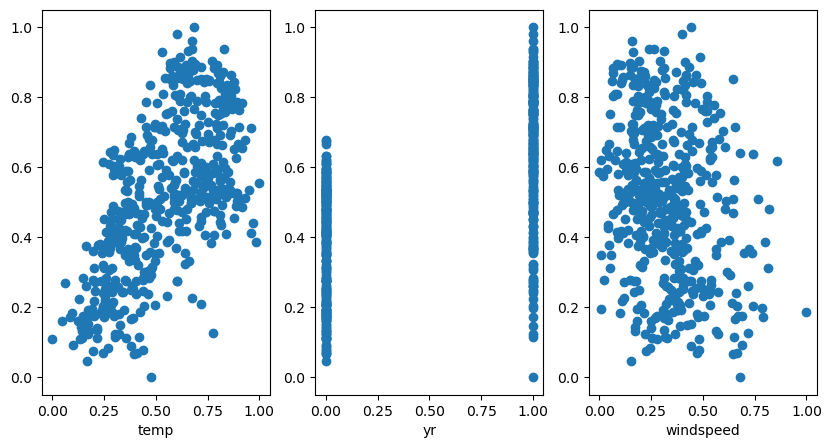

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(X_train_6['temp'], y=y_train)
plt.xlabel('temp')
plt.subplot(1,3,2)
plt.scatter(X_train_6['yr'], y=y_train)
plt.xlabel('yr')
plt.subplot(1,3,3)
plt.scatter(X_train_6['windspeed'], y=y_train)
plt.xlabel('windspeed')



### Residual analysis

### Normality of error terms

In [78]:
y_pred = lm_6.predict(X_train_6)

Text(0.5, 0, 'Error')

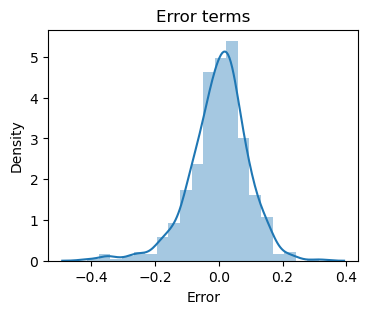

In [79]:
plt.figure(figsize=(4,3))
sns.distplot((y_train - y_pred),bins=20)
plt.title("Error terms")
plt.xlabel("Error")

Notes: Error terms are distributed normal with mean at 0

### homoscedasticity

Text(0, 0.5, 'y_pred')

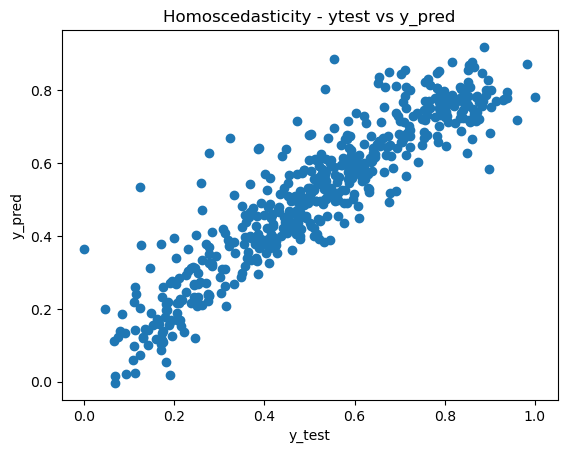

In [80]:
# plot y_test vs y_pred to verify the error terms spread

plt.scatter(x=y_train, y = y_pred)
plt.title("Homoscedasticity - ytest vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")


Notes: Error terms variance is mostly constant

### Independent Error terms

Text(0.5, 1.0, 'Independent Error terms - ytest vs y_pred')

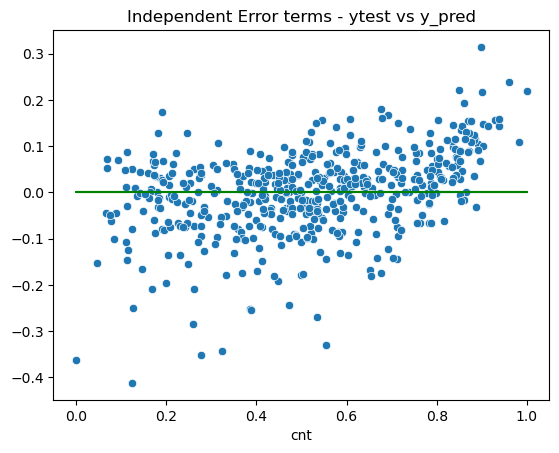

In [81]:
residual_train = y_train - y_pred
sns.scatterplot(y_train,residual_train)
plt.plot(y_train, (y_train - y_train),'g')
plt.title("Independent Error terms - ytest vs y_pred")

## Prediction using the final model - lm_6

Notes: Error terms are independent in the model

In [82]:
# first apply the scaling for df_test
df_test[num_scale] = scaler.transform(df_test[num_scale])

In [83]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weathersit_2,weathersit_3,...,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.318182,0.027273,...,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.466833,0.163248,...,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### split X_test and y_test

In [84]:
X_test = df_test[['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'weathersit_2', 'weathersit_3', 'mnth_sep',
       'weekday_6']]

In [85]:
y_test = df_test.cnt

In [86]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lm_6.predict(X_test_sm)

## Model evaluation on test set

In [87]:
# find the r-squared for test dataset
r2_score(y_test,y_test_pred)

0.7961390438459766

Notes: __r-squared of both train dataset(83.5%) and test dataset looks very close(79.6%)__

Text(0.5, 1.0, 'y_test vs y_test_pred')

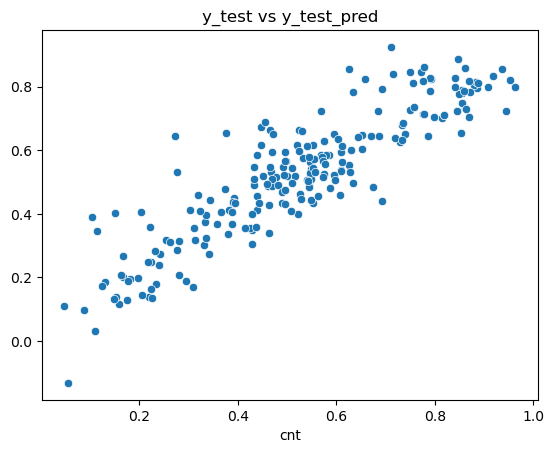

In [88]:
## visualizing y_test vs y_test_pred
sns.scatterplot(x=y_test , y = y_test_pred)
plt.title("y_test vs y_test_pred")

Text(0, 0.5, 'y_test_pred')

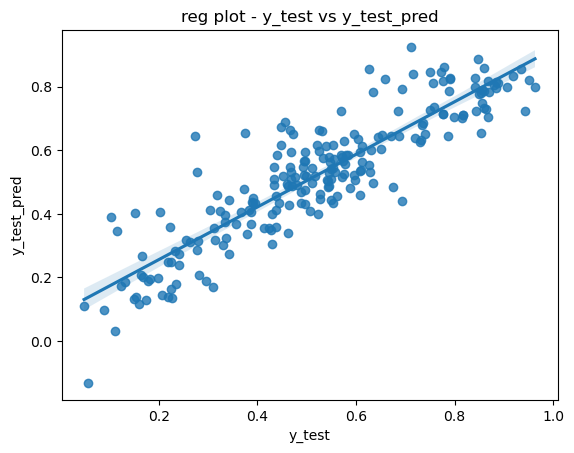

In [89]:
## reg plot
sns.regplot(x=y_test , y = y_test_pred)
plt.title("reg plot - y_test vs y_test_pred")
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

### Summary
##### Final Model expression
__total_bookings(cnt)__ = 0.0750 + 0.2331 * __(year)__ + 0.0561 * __(workingday)__ + 0.5499 * __(temp)__ - 0.1552 * __(windspeed)__ + 0.0886 * __(season_summer)__ + 0.1307 * __(season_winter)__ -0.0800 * __(weathersit_2)__ - 0.2871 * __(weatthersit_3)__  + 0.0974 * __(mnth_sep)__ + 0.0675 * __(weekend_6)__

## How to read?

If one of the independent variable is increase by one unit, keeping the other independent variables as constant, the dependent variable(cnt) increase by beta co-efficient times.

Independent variables on which dependent variable(cnt) depends:
> - yr 
> - workingday
> - temp
> - windspeed
> - season_summer
> - season_winter
> - weathersit_2
> - weathersit_3
> - mnth_sep
> - weekday_6
